# Association Rules

A store is interested in determining the associations between items purchased from its
Departments. The store chose to conduct a market basket analysis of specific items purchased
to analyze customer’s buying behavior. You are hereby provided with a file
‘transactions.csv’ containing information for transactions made over the past 3 months.

In [1]:
# https://www.datacamp.com/community/tutorials/market-basket-analysis-r
#install and load package 

#install.packages("arules")
library(arules)
#install.packages("arulesViz")
library(arulesViz)
#install.packages("tidyverse")
library(tidyverse)
#install.packages("readxml")
library(readxl)
#install.packages("knitr")
library(knitr)
library(ggplot2)
#install.packages("lubridate")
library(lubridate)
#install.packages("plyr")
library(plyr)
library(dplyr)


Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.2
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is l

In [2]:
library(arules)
library(arulesViz)
library(raster)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following object is masked from ‘package:tidyr’:

    extract



In [3]:
data<- read.transactions("/home/khadija/Downloads/transactions.csv", format = 'basket', sep=',')

Warning message in asMethod(object):
“removing duplicated items in transactions”

In [4]:
data

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [5]:
class(data)

[1] "transactions"
attr(,"package")
[1] "arules"

In [6]:
summary(data)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

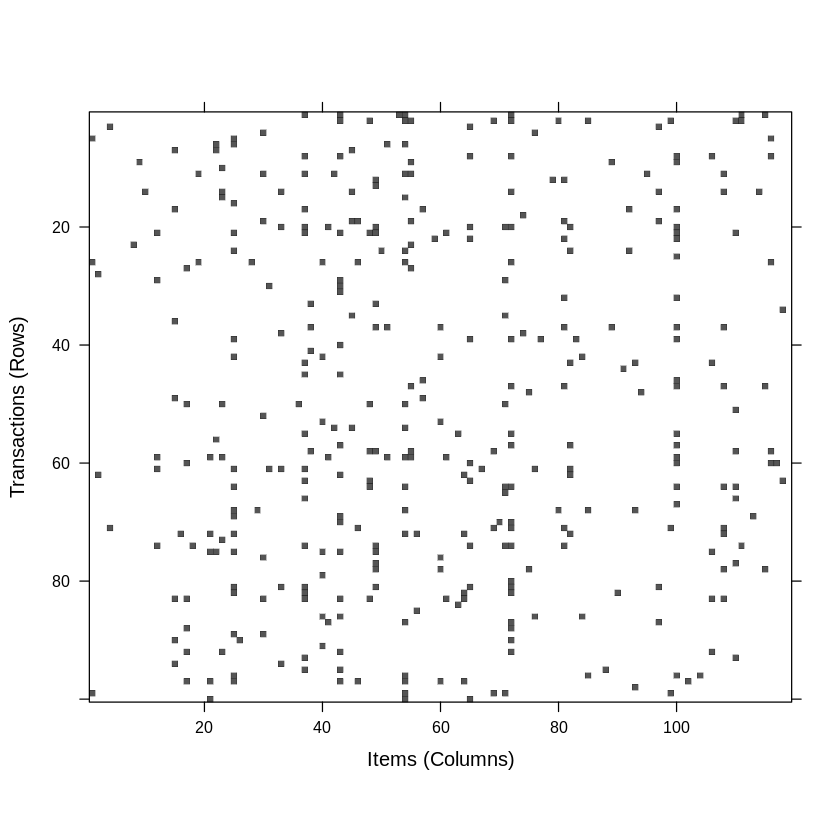

In [7]:
# visualization of a random sample of 100 transactions
image(sample(data, 100))

In [9]:
inspect(data)

       items                 
[1]    {almonds,             
        antioxydant juice,   
        avocado,             
        cottage cheese,      
        energy drink,        
        frozen smoothie,     
        green grapes,        
        green tea,           
        honey,               
        low fat yogurt,      
        mineral water,       
        olive oil,           
        salad,               
        salmon,              
        shrimp,              
        spinach,             
        tomato juice,        
        vegetables mix,      
        whole weat flour,    
        yams}                
[2]    {burgers,             
        eggs,                
        meatballs}           
[3]    {chutney}             
[4]    {avocado,             
        turkey}              
[5]    {energy bar,          
        green tea,           
        milk,                
        mineral water,       
        whole wheat rice}    
[6]    {low fat yogurt}      
[7]    {fr

Loading required package: RColorBrewer


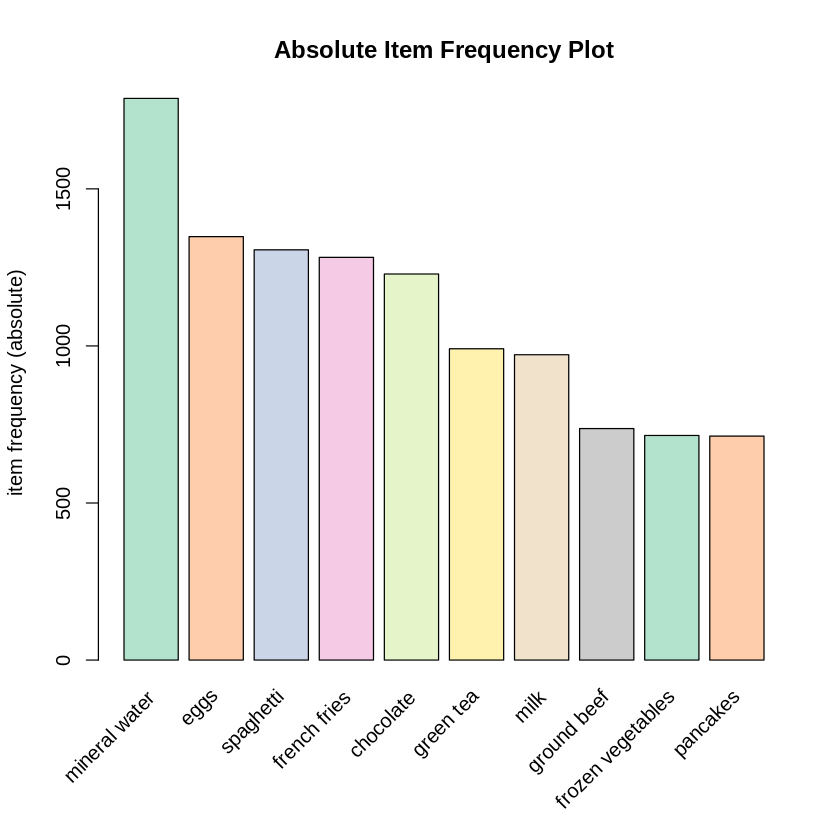

In [10]:
# Create an item frequency plot for the top 20 items
if (!require("RColorBrewer")) {
  # install color package of R
install.packages("RColorBrewer")
#include library RColorBrewer
library(RColorBrewer)
}
itemFrequencyPlot(data,topN=10,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")


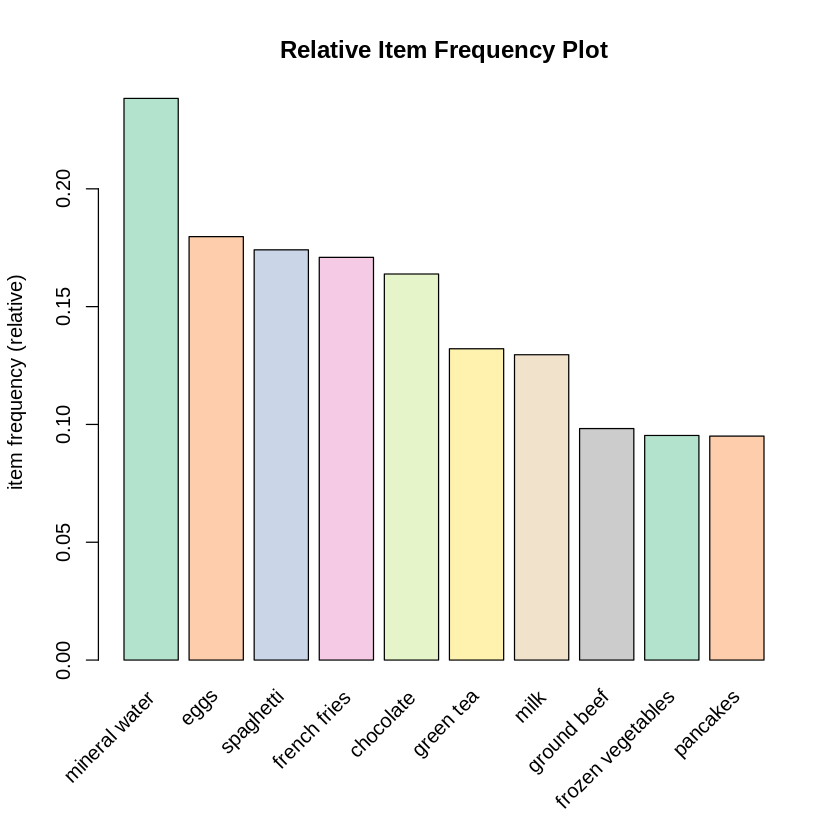

In [11]:
itemFrequencyPlot(data,topN=10,type="relative",col=brewer.pal(8,'Pastel2'),main="Relative Item Frequency Plot")


In [26]:
dataRules <- apriori(data, parameter = list(supp=0.002, conf=0.2,maxlen=3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(data, parameter = list(supp = 0.002, conf = 0.2, maxlen = 3)):
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”

 done [0.01s].
writing ... [2023 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [27]:
# finding subsets of rules containing any pancakes  items
drule <- subset(dataRules, items %in% "pancakes")
inspect(drule)


      lhs                                  rhs                 support    
[1]   {gluten free bar}                 => {pancakes}          0.002133049
[2]   {whole weat flour}                => {pancakes}          0.002266364
[3]   {bacon}                           => {pancakes}          0.002133049
[4]   {extra dark chocolate}            => {pancakes}          0.002399680
[5]   {light cream}                     => {pancakes}          0.003466205
[6]   {light mayo}                      => {pancakes}          0.005465938
[7]   {fresh tuna}                      => {pancakes}          0.005065991
[8]   {pancakes}                        => {french fries}      0.020130649
[9]   {pancakes}                        => {chocolate}         0.019864018
[10]  {pancakes}                        => {eggs}              0.021730436
[11]  {pancakes}                        => {spaghetti}         0.025196640
[12]  {pancakes}                        => {mineral water}     0.033728836
[13]  {fresh tuna,pancake

In [28]:
summary(dataRules)

set of 2023 rules

rule length distribution (lhs + rhs):sizes
   1    2    3 
   1  357 1665 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   3.000   2.823   3.000   3.000 

summary of quality measures:
    support           confidence        coverage             lift        
 Min.   :0.002133   Min.   :0.2000   Min.   :0.002666   Min.   : 0.8595  
 1st Qu.:0.002533   1st Qu.:0.2405   1st Qu.:0.008266   1st Qu.: 1.5377  
 Median :0.003466   Median :0.2941   Median :0.011465   Median : 1.8674  
 Mean   :0.005292   Mean   :0.3177   Mean   :0.018647   Mean   : 2.0415  
 3rd Qu.:0.005599   3rd Qu.:0.3774   3rd Qu.:0.019064   3rd Qu.: 2.3381  
 Max.   :0.238368   Max.   :0.9500   Max.   :1.000000   Max.   :28.0881  
     count       
 Min.   :  16.0  
 1st Qu.:  19.0  
 Median :  26.0  
 Mean   :  39.7  
 3rd Qu.:  42.0  
 Max.   :1788.0  

mining info:
 data ntransactions support confidence
 data          7501   0.002        0.2

In [29]:
inspect(dataRules[1:10])

     lhs                  rhs             support     confidence coverage   
[1]  {}                => {mineral water} 0.238368218 0.2383682  1.000000000
[2]  {asparagus}       => {mineral water} 0.002133049 0.4444444  0.004799360
[3]  {candy bars}      => {mineral water} 0.002266364 0.2328767  0.009732036
[4]  {shallot}         => {green tea}     0.002266364 0.2931034  0.007732302
[5]  {shallot}         => {french fries}  0.002666311 0.3448276  0.007732302
[6]  {mayonnaise}      => {mineral water} 0.002932942 0.4782609  0.006132516
[7]  {gluten free bar} => {pancakes}      0.002133049 0.3076923  0.006932409
[8]  {gluten free bar} => {mineral water} 0.002133049 0.3076923  0.006932409
[9]  {burger sauce}    => {spaghetti}     0.002399680 0.4090909  0.005865885
[10] {burger sauce}    => {mineral water} 0.002399680 0.4090909  0.005865885
     lift      count
[1]  1.0000000 1788 
[2]  1.8645290   16 
[3]  0.9769621   17 
[4]  2.2185358   17 
[5]  2.0175910   20 
[6]  2.0063953   22 
[7]  3

In [30]:
# sorting grocery rules by lift to determine actionable rules
inspect(sort(dataRules, by = "lift")[1:10])

     lhs                                    rhs                    support    
[1]  {escalope,mushroom cream sauce}     => {pasta}                0.002532996
[2]  {escalope,pasta}                    => {mushroom cream sauce} 0.002532996
[3]  {mushroom cream sauce,pasta}        => {escalope}             0.002532996
[4]  {parmesan cheese,tomatoes}          => {frozen vegetables}    0.002133049
[5]  {mineral water,whole wheat pasta}   => {olive oil}            0.003866151
[6]  {frozen vegetables,parmesan cheese} => {tomatoes}             0.002133049
[7]  {burgers,herb & pepper}             => {ground beef}          0.002266364
[8]  {light cream,mineral water}         => {chicken}              0.002399680
[9]  {ground beef,shrimp}                => {herb & pepper}        0.002932942
[10] {fromage blanc}                     => {honey}                0.003332889
     confidence coverage    lift      count
[1]  0.4418605  0.005732569 28.088096 19   
[2]  0.4318182  0.005865885 22.650826 19   

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


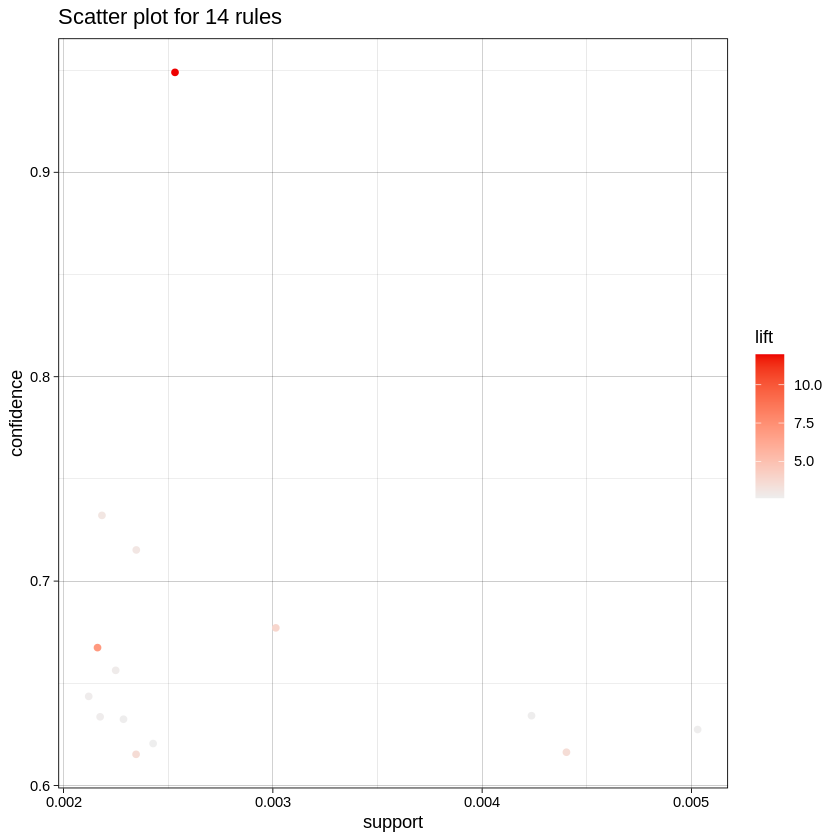

In [16]:
# Filter rules with confidence greater than 0.4 or 40%
subRules<-dataRules[quality(dataRules)$confidence>0.6]
#Plot SubRules
plot(subRules)

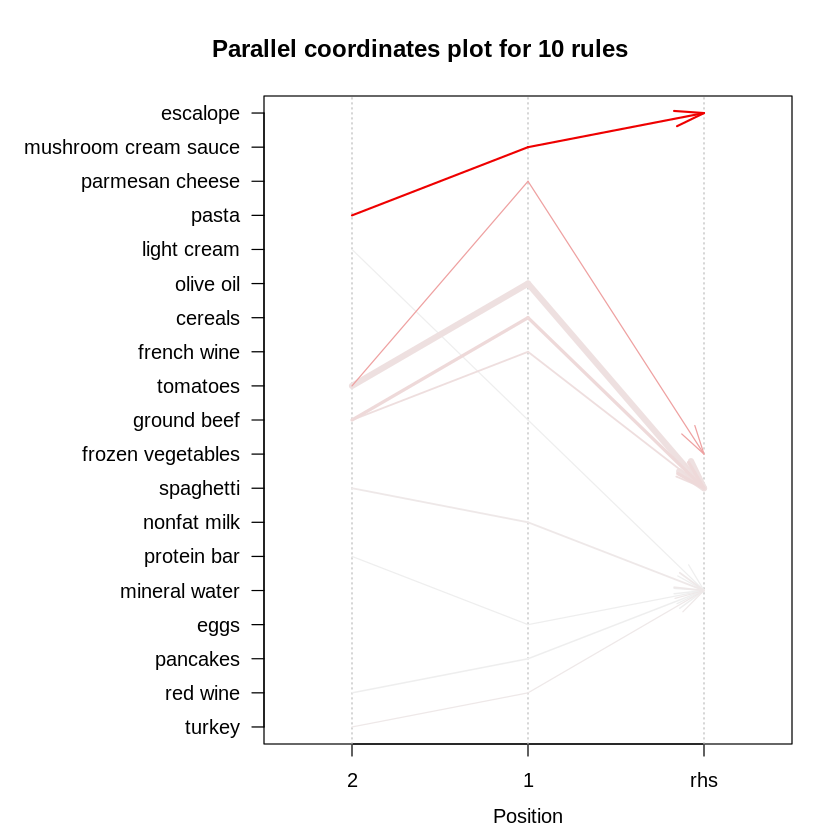

In [19]:
# Filter top 20 rules with highest lift
subRules2<-head(subRules, n=10, by="lift")
plot(subRules2, method="paracoord")

# Course Recommender System using Collaborative Filtering

The Institute for Statistics Education at Statistics.com asks students to rate a variety of aspects of
a course as soon as the student completes it. The Institute is contemplating instituting a
recommendation system that would provide students with recommendations for additional
courses as soon as they submit their rating for a completed course. Consider the excerpt fromstudent ratings of online statistics courses shown in the Table 14.16, and the problem of what to
recommend to student E.N.

### 2) Based on the single nearest student to E.N., which single course should we recommend to E.N.? Explain why.

### 3) Use R to compute the cosine similarity between users.

In [76]:
# make a df of data we have
df <- data.frame (SQL = c(4,3,2,4,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,4),
                  Spatial=c(NA,4,2,NA,4,4,4,3,NA,NA,NA,NA,NA,NA,NA),
                  PA1=c(NA,NA,NA,NA,NA,NA,NA,NA,4,2,4,4,4,3,NA),
                  DM.in.R=c(NA,NA,NA,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2),
                  Python=c(3,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA),
                  Forcast=c(NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,2,4,NA,NA,NA),
                  R.prog=c(4,NA,NA,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,4),
                  Hadoop=c(NA,NA,NA,NA,NA,NA,NA,NA,NA,4,NA,NA,NA,NA,NA),
                  Regression=c(2,NA,NA,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA)
                  
                  )
rownames(df) <- c("LN","MH","JH","EN","DU","FL","GL","AH","SA","RW","BA","MG","AF","KG","DS")

In [77]:
df

,SQL,Spatial,PA1,DM.in.R,Python,Forcast,R.prog,Hadoop,Regression
LN,4,NA,NA,NA,3,NA,4,NA,2
MH,3,4,NA,NA,4,NA,NA,NA,NA
JH,2,2,NA,NA,NA,NA,NA,NA,NA
EN,4,NA,NA,4,NA,NA,4,NA,3
DU,4,4,NA,NA,NA,NA,NA,NA,NA
FL,NA,4,NA,NA,NA,NA,NA,NA,NA
GL,NA,4,NA,NA,NA,NA,NA,NA,NA
AH,NA,3,NA,NA,NA,NA,NA,NA,NA
SA,NA,NA,4,NA,NA,NA,NA,NA,NA
RW,NA,NA,2,NA,NA,NA,NA,4,NA


In [114]:
df[is.na(df)] <- 0

In [115]:
EN<-df[4,]
ENvec=data.matrix(EN)

In [137]:
d=data.matrix(df)


In [138]:
d

,SQL,Spatial,PA1,DM.in.R,Python,Forcast,R.prog,Hadoop,Regression
LN,4,0,0,0,3,0,4,0,2
MH,3,4,0,0,4,0,0,0,0
JH,2,2,0,0,0,0,0,0,0
EN,4,0,0,4,0,0,4,0,3
DU,4,4,0,0,0,0,0,0,0
FL,0,4,0,0,0,0,0,0,0
GL,0,4,0,0,0,0,0,0,0
AH,0,3,0,0,0,0,0,0,0
SA,0,0,4,0,0,0,0,0,0
RW,0,0,2,0,0,0,0,4,0


### 4) Based on the cosine similarities of the nearest students to E.N., which course should be recommended to E.N.?

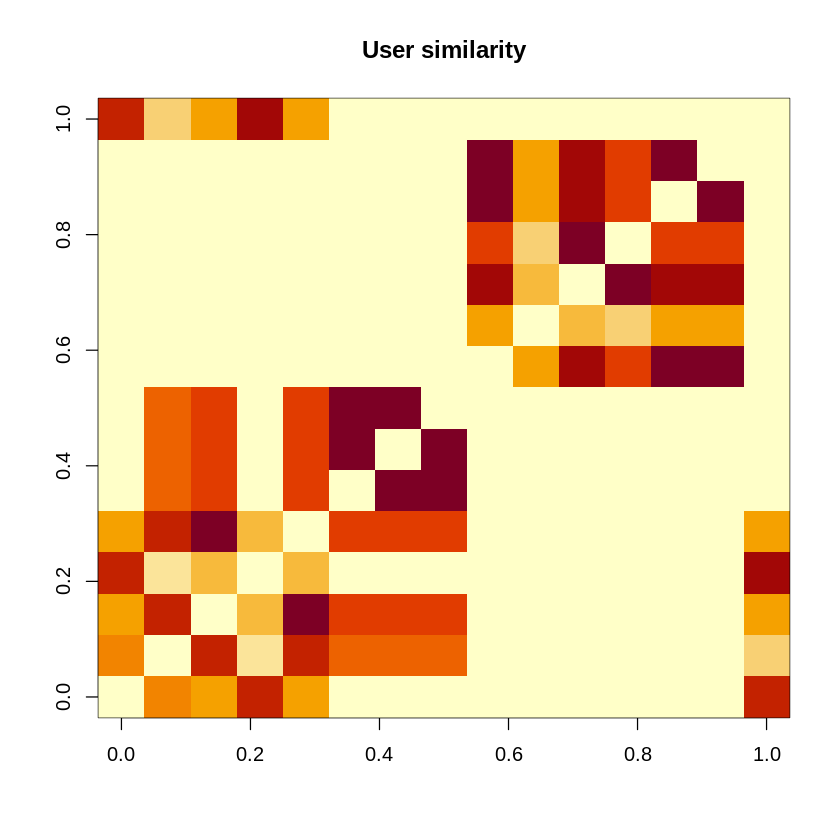

In [152]:
#similarity matrix
dd = as(d, "realRatingMatrix")
similarity_users <- similarity(dd, method =  "cosine", which = "users") 
image(as.matrix(similarity_users), main = "User similarity")

In [136]:
#install.packages("lsa")
library(lsa)

#calculate Cosine Similarity
cosine(t(d))

,LN,MH,JH,EN,DU,FL,GL,AH,SA,RW,BA,MG,AF,KG,DS
LN,1.0000000,0.5587442,0.4216370,0.7503086,0.4216370,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7950464
MH,0.5587442,1.0000000,0.7730207,0.2482286,0.7730207,0.6246950,0.6246950,0.6246950,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.3123475
JH,0.4216370,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
EN,0.7503086,0.2482286,0.3746343,1.0000000,0.3746343,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.8830216
DU,0.4216370,0.7730207,1.0000000,0.3746343,1.0000000,0.7071068,0.7071068,0.7071068,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4714045
FL,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
GL,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
AH,0.0000000,0.6246950,0.7071068,0.0000000,0.7071068,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
SA,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4472136,0.8944272,0.7071068,1.0000000,1.0000000,0.0000000
RW,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.4472136,1.0000000,0.4000000,0.3162278,0.4472136,0.4472136,0.0000000


In [139]:
cosine(d)

,SQL,Spatial,PA1,DM.in.R,Python,Forcast,R.prog,Hadoop,Regression
SQL,1.0000000,0.4155844,0.0000000,0.6115766,0.5470108,0.0000000,0.7895420,0.0000000,0.6321395
Spatial,0.4155844,1.0000000,0.0000000,0.0000000,0.3646738,0.0000000,0.0000000,0.0000000,0.0000000
PA1,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.6115766,0.0000000,0.2279212,0.0000000
DM.in.R,0.6115766,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.7745967,0.0000000,0.7442084
Python,0.5470108,0.3646738,0.0000000,0.0000000,1.0000000,0.0000000,0.3464102,0.0000000,0.3328201
Forcast,0.0000000,0.0000000,0.6115766,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
R.prog,0.7895420,0.0000000,0.0000000,0.7745967,0.3464102,0.0000000,1.0000000,0.0000000,0.8006408
Hadoop,0.0000000,0.0000000,0.2279212,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
Regression,0.6321395,0.0000000,0.0000000,0.7442084,0.3328201,0.0000000,0.8006408,0.0000000,1.0000000


### 5) Apply item-based collaborative filtering to this dataset (using R) and based on the results, recommend a course to E.N.

In [183]:
# Data loading
library(recommenderlab)
#Building model
model <- Recommender(dd, method = "IBCF", 
                     param=list(method="Cosine"))
#Create Recommender Model. The parameters are UBCF and Cosine similarity. We take 10 nearest neighbours
#rec_mod = Recommender(ratingmat, method = "UBCF",) 

Top_5_pred = predict(model, dd[4], n=5)


#Convert the recommendations to a list
Top_5_List 

$LN
character(0)

$MH
character(0)

$JH
character(0)

$EN
character(0)

$DU
character(0)

$FL
character(0)

$GL
character(0)

$AH
character(0)

$SA
character(0)

$RW
character(0)

$BA
character(0)

$MG
character(0)

$AF
character(0)

$KG
character(0)

$DS
character(0)